**Import packages**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

**Read the CSV files**

In [55]:
dh_casual_lookup = pd.read_csv('/kaggle/input/data-cafe/dh_causal_lookup.csv')
dh_product_lookup = pd.read_csv('/kaggle/input/data-cafe/dh_product_lookup.csv')
dh_store_lookup = pd.read_csv('/kaggle/input/data-cafe/dh_store_lookup.csv')
dh_transactions_lookup = pd.read_csv('/kaggle/input/data-cafe/dh_transactions.csv')

**Review the data**

In [56]:
dh_casual_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   upc           351372 non-null  int64 
 1   store         351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature_desc  351372 non-null  object
 4   display_desc  351372 non-null  object
 5   geography     351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


In [57]:
dh_transactions_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


In [58]:
dh_transactions_lookup.isnull().sum()

upc                    0
dollar_sales           0
units                  0
time_of_transaction    0
geography              0
week                   0
household              0
store                  0
basket                 0
day                    0
coupon                 0
dtype: int64

**Delete the dollar_sales column with < 0 value**

In [59]:
dh_transactions_lookup = dh_transactions_lookup[dh_transactions_lookup['dollar_sales'] >= 0]
dh_transactions_lookup

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0


**Create a upc_store_week_code key on dh_casual_lookup table**

In [60]:
def concat(row):
    return "{}-{}-{}".format(row['upc'], row['store'], row['week'])

dh_casual_lookup['upc_store_week_code'] = dh_casual_lookup.apply(concat, axis=1)

dh_casual_lookup.head()

,upc,store,week,feature_desc,display_desc,geography,upc_store_week_code
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1,7680850108-1-68
1,5100001212,1,66,Wrap Back Feature,Not on Display,1,5100001212-1-66
2,5100002792,1,72,Interior Page Feature,Not on Display,1,5100002792-1-72
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1,3620000300-1-55
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1,4112907742-1-68


**We dont need upc, store, week and geography column.**

In [61]:
dh_casual_lookup = dh_casual_lookup.drop(['upc','store','week','geography'], axis = 1)

In [62]:
dh_transactions_lookup.columns

Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon'],
      dtype='object')

In [63]:
dh_transactions_lookup['upc'] = dh_transactions_lookup['upc'].astype(str)
dh_transactions_lookup['store'] = dh_transactions_lookup['store'].astype(str)
dh_transactions_lookup['week'] = dh_transactions_lookup['week'].astype(str)

**Create a upc_store_week_code key on dh_transactions_lookup table**

In [64]:
def concat(row):
    return "{}-{}-{}".format(row['upc'], row['store'], row['week'])


dh_transactions_lookup['upc_store_week_code'] = dh_transactions_lookup.apply(concat, axis=1)



In [65]:
dh_transactions_lookup = dh_transactions_lookup.drop(['upc','week','store'],axis = 1)

In [66]:
dh_transactions_lookup

,dollar_sales,units,time_of_transaction,geography,household,basket,day,coupon,upc_store_week_code
0,0.80,1,1100,2,125434,1,1,0,7680850106-244-1
1,3.59,1,1100,2,125434,1,1,0,3620000470-244-1
2,2.25,1,1137,2,108320,2,1,0,1800028064-244-1
3,0.85,1,1148,2,162016,3,1,0,9999985067-244-1
4,2.19,1,1323,2,89437,4,1,0,9999985131-244-1
...,...,...,...,...,...,...,...,...,...
5197676,0.39,1,2354,1,435465,3316346,728,0,9999985001-199-104
5197677,1.05,1,2354,1,435465,3316346,728,0,9999966720-199-104
5197678,0.99,1,2311,1,352690,3316347,728,0,9999985027-218-104
5197679,1.53,1,2245,1,55530,3316348,728,0,3620000300-93-104


**Inner join dh_casual_lookup with dh_transactions_lookup on upc_store_week_code**


In [67]:
df = pd.merge(dh_transactions_lookup,dh_casual_lookup,on='upc_store_week_code')

In [68]:
df

,dollar_sales,units,time_of_transaction,geography,household,basket,day,coupon,upc_store_week_code,feature_desc,display_desc
0,0.79,1,1125,2,124468,964711,300,0,9999985046-244-43,Front Page Feature,Not on Display
1,0.79,1,1104,2,97456,1326110,299,0,9999985046-244-43,Front Page Feature,Not on Display
2,0.79,1,1125,2,124468,964711,300,0,9999985040-244-43,Front Page Feature,Not on Display
3,1.58,2,2138,2,18425,964718,300,0,9999985047-244-43,Front Page Feature,Not on Display
4,0.89,1,1838,2,389596,964720,300,0,2700042254-365-43,Not on Feature,In-Aisle
...,...,...,...,...,...,...,...,...,...,...,...
380272,2.00,1,1023,1,231841,3316302,726,0,3620000474-179-104,Interior Page Feature,Not on Display
380273,4.00,2,1023,1,231841,3316302,726,0,3620000475-179-104,Interior Page Feature,Not on Display
380274,2.00,1,2334,1,379026,3316316,728,0,3620000473-108-104,Interior Page Feature,Not on Display
380275,2.00,1,2234,1,174208,3316320,728,0,3620000432-21-104,Interior Page Feature,Not on Display


**Plot the barplot to review the data**


Text(0.5, 0, 'Display')

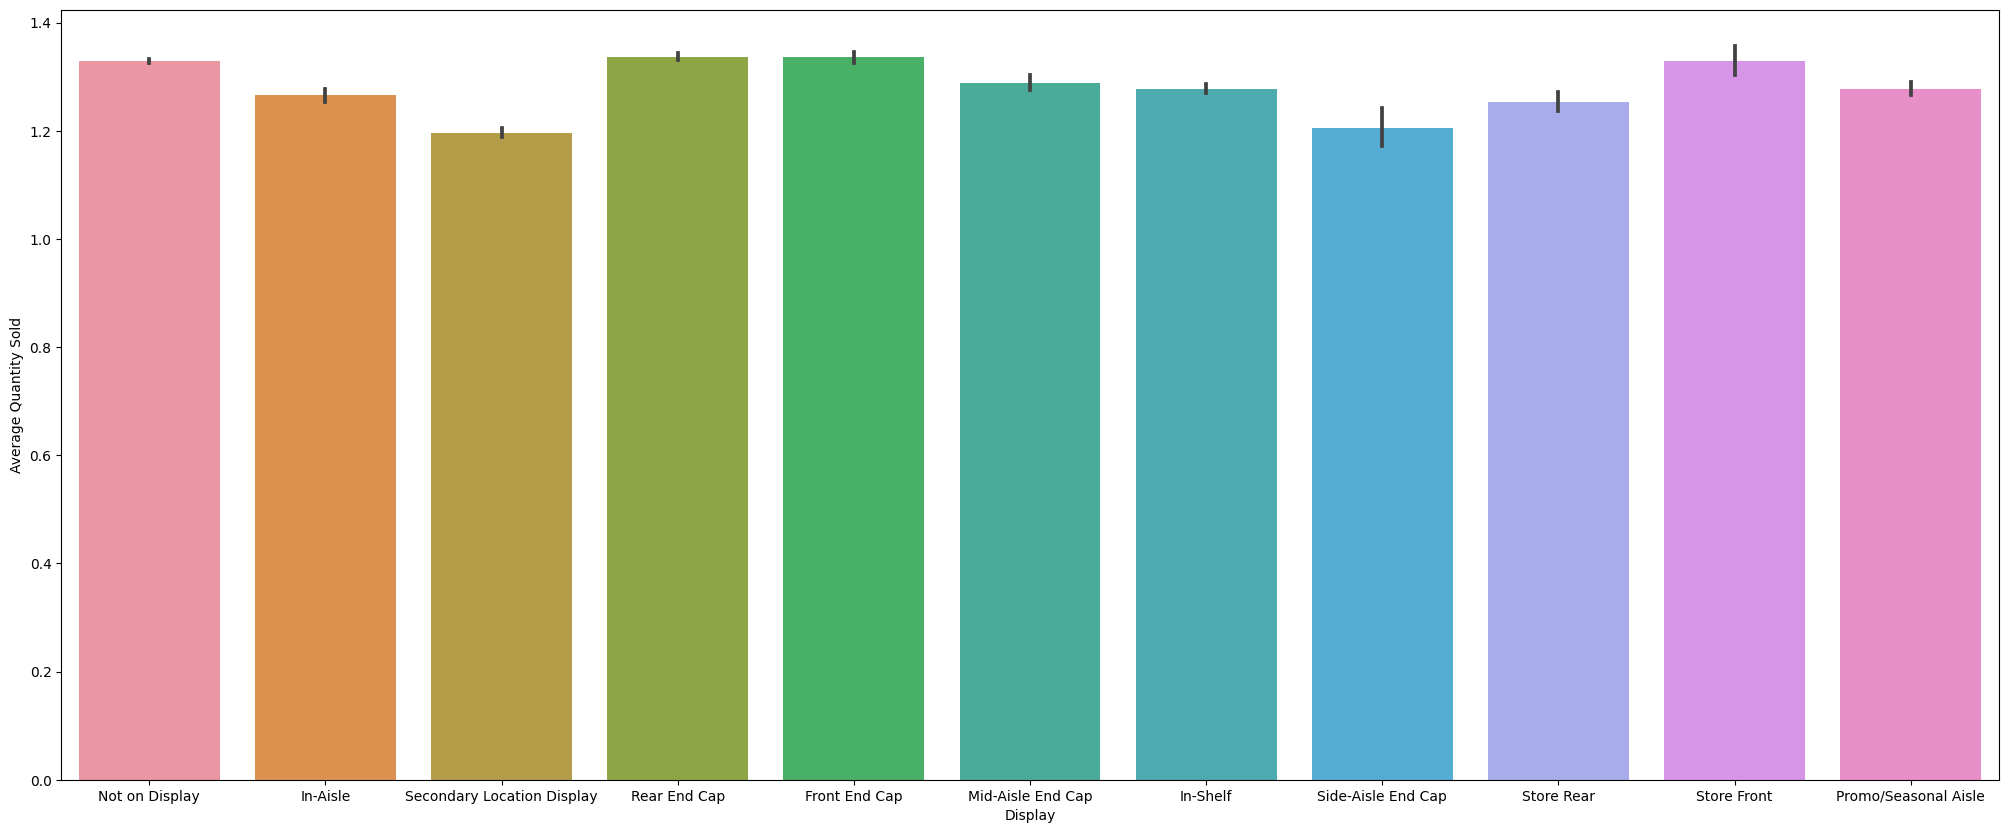

In [69]:
plt.figure(figsize=(25,10))
sns.barplot(data=df, x="display_desc", y="units")

plt.ylabel("Average Quantity Sold")
plt.xlabel("Display")

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
df

,dollar_sales,units,time_of_transaction,geography,household,basket,day,coupon,upc_store_week_code,feature_desc,display_desc
0,0.79,1,1125,2,124468,964711,300,0,9999985046-244-43,Front Page Feature,Not on Display
1,0.79,1,1104,2,97456,1326110,299,0,9999985046-244-43,Front Page Feature,Not on Display
2,0.79,1,1125,2,124468,964711,300,0,9999985040-244-43,Front Page Feature,Not on Display
3,1.58,2,2138,2,18425,964718,300,0,9999985047-244-43,Front Page Feature,Not on Display
4,0.89,1,1838,2,389596,964720,300,0,2700042254-365-43,Not on Feature,In-Aisle
...,...,...,...,...,...,...,...,...,...,...,...
380272,2.00,1,1023,1,231841,3316302,726,0,3620000474-179-104,Interior Page Feature,Not on Display
380273,4.00,2,1023,1,231841,3316302,726,0,3620000475-179-104,Interior Page Feature,Not on Display
380274,2.00,1,2334,1,379026,3316316,728,0,3620000473-108-104,Interior Page Feature,Not on Display
380275,2.00,1,2234,1,174208,3316320,728,0,3620000432-21-104,Interior Page Feature,Not on Display


In [72]:
X = df['display_desc']
y = df['units']

In [73]:
##X['geography'] = X['geography'].astype(str)

**Get the dummy variable on X table**

In [74]:
X = pd.get_dummies(data=X, drop_first=True)

In [75]:
X

,In-Aisle,In-Shelf,Mid-Aisle End Cap,Not on Display,Promo/Seasonal Aisle,Rear End Cap,Secondary Location Display,Side-Aisle End Cap,Store Front,Store Rear
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
380272,0,0,0,1,0,0,0,0,0,0
380273,0,0,0,1,0,0,0,0,0,0
380274,0,0,0,1,0,0,0,0,0,0
380275,0,0,0,1,0,0,0,0,0,0


**Split the train and test data**

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lm = LinearRegression()

**Fit the linear regression model**

In [79]:
lm.fit(X_train,y_train)

LinearRegression()

In [80]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.06334611 -0.04916275 -0.03886898 -0.00072537 -0.05638985  0.01179865
 -0.13694415 -0.13171145 -0.00033857 -0.08655223]


**Report the coefficients**

In [81]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['coefficient']
coeffecients.sort_values('coefficient',ascending=False)

,coefficient
Rear End Cap,0.011799
Store Front,-0.000339
Not on Display,-0.000725
Mid-Aisle End Cap,-0.038869
In-Shelf,-0.049163
Promo/Seasonal Aisle,-0.056390
In-Aisle,-0.063346
Store Rear,-0.086552
Side-Aisle End Cap,-0.131711
Secondary Location Display,-0.136944
